<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
# import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

pandas.options.display.max_rows = 4000

seaborn.set_context(context='talk', font_scale=1.2)

In [2]:
import cufflinks as cf
cf.set_config_file(offline=True)

In [3]:
seaborn.__version__

'0.9.0'

In [4]:
dataset = pandas.read_csv('../datasets/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [5]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [6]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]
idataset = dataset[important_cols]

In [6]:
dataset[important_cols]

year ISO_code               countries                         region  \
0     2016      ALB                 Albania                 Eastern Europe   
1     2016      DZA                 Algeria     Middle East & North Africa   
2     2016      AGO                  Angola             Sub-Saharan Africa   
3     2016      ARG               Argentina  Latin America & the Caribbean   
4     2016      ARM                 Armenia        Caucasus & Central Asia   
5     2016      AUS               Australia                        Oceania   
6     2016      AUT                 Austria                 Western Europe   
7     2016      AZE              Azerbaijan        Caucasus & Central Asia   
8     2016      BHS                 Bahamas  Latin America & the Caribbean   
9     2016      BHR                 Bahrain     Middle East & North Africa   
10    2016      BGD              Bangladesh                     South Asia   
11    2016      BRD                Barbados  Latin America & the Caribbean   
12    2016      BLR                 Belarus                 Eastern Europe   
13    2016      BEL                 Belgium                 Western Europe   
14    2016      BLZ                  Belize  Latin America & the Caribbean   
15    2016      BEN                   Benin             Sub-Saharan Africa   
16    2016      BTN                  Bhutan                     South Asia   
17    2016      BOL                 Bolivia  Latin America & the Caribbean   
18    2016      BIH  Bosnia and Herzegovina                 Eastern Europe   
19    2016      BWA                Botswana             Sub-Saharan Africa   
20    2016      BRA                  Brazil  Latin America & the Caribbean   
21    2016      BRN       Brunei Darussalam                     South Asia   
22    2016      BGR                Bulgaria                 Eastern Europe   
23    2016      BFA            Burkina Faso             Sub-Saharan Africa   
24    2016      BDI                 Burundi             Sub-Saharan Africa   
25    2016      KHM                Cambodia                     South Asia   
26    2016      CMR                Cameroon             Sub-Saharan Africa   
27    2016      CAN                  Canada                  North America   
28    2016      CPV              Cape Verde             Sub-Saharan Africa   
29    2016      CAF       Central Afr. Rep.             Sub-Saharan Africa   
30    2016      TCD                    Chad             Sub-Saharan Africa   
31    2016      CHL                   Chile  Latin America & the Caribbean   
32    2016      CHN                   China                      East Asia   
33    2016      COL                Colombia  Latin America & the Caribbean   
34    2016      COD          Congo, Dem. R.             Sub-Saharan Africa   
35    2016      COG          Congo, Rep. Of             Sub-Saharan Africa   
36    2016      CRI              Costa Rica  Latin America & the Caribbean   
37    2016      CIV           Cote d'Ivoire             Sub-Saharan Africa   
38    2016      HRV                 Croatia                 Eastern Europe   
39    2016      CYP                  Cyprus                 Eastern Europe   
40    2016      CZE              Czech Rep.                 Eastern Europe   
41    2016      DNK                 Denmark                 Western Europe   
42    2016      DOM          Dominican Rep.  Latin America & the Caribbean   
43    2016      ECU                 Ecuador  Latin America & the Caribbean   
44    2016      EGY                   Egypt     Middle East & North Africa   
45    2016      SLV             El Salvador  Latin America & the Caribbean   
46    2016      EST                 Estonia                 Eastern Europe   
47    2016      ETH                Ethiopia             Sub-Saharan Africa   
48    2016      FJI                    Fiji                        Oceania   
49    2016      FIN                 Finland                 Western Europe   
50    2016      FRA         

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [13]:
for col in important_cols[4:]:
    print(f"Rango {col} {idataset[col].max() - idataset[col].min()}");

Rango pf_identity_legal 10.0
Rango pf_identity_parental_marriage 10.0
Rango pf_identity_parental_divorce 10.0
Rango pf_identity_parental 10.0
Rango pf_identity_sex_male 10.0
Rango pf_identity_sex_female 10.0
Rango pf_identity_sex 10.0
Rango pf_identity_divorce 10.0
Rango pf_identity 10.0
Rango ef_score 6.31
Rango ef_rank 161.0
Rango hf_score 5.360486062
Rango hf_rank 161.0


2. Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda?

Para mi en este caso no tiene sentido calcular la moda porque no nos daria ninguna información de valor sobre el valor de datos en su conjunto.

In [22]:
latinoamerica =  dataset[dataset["region"] == "Latin America & the Caribbean"]
print(latinoamerica[["pf_identity", "hf_score"]].median())
print(latinoamerica[["pf_identity", "hf_score"]].mean())
print(latinoamerica[["pf_identity", "hf_score"]].std())

pf_identity    10.000000
hf_score        7.028045
dtype: float64
pf_identity    8.765086
hf_score       7.047982
dtype: float64
pf_identity    1.711732
hf_score       0.608904
dtype: float64


In [23]:
print(dataset[["pf_identity", "hf_score"]].median())
print(dataset[["pf_identity", "hf_score"]].mean())
print(dataset[["pf_identity", "hf_score"]].std())

pf_identity    9.166667
hf_score       6.923840
dtype: float64
pf_identity    7.334180
hf_score       6.993444
dtype: float64
pf_identity    3.159473
hf_score       1.025811
dtype: float64


3. ¿Son todos los valores de pf_identity y hf_score directamente comparables? ¿Qué otra variable podría influenciarlos?

Los podemos comparar y asi evaluar cual es el comportamiento de acuerdo a el score que obtenga, pero son son directamente proporcionales. Aparte estos valos se pueden ver influenciados tambien por la libertad economica. 

In [25]:
#seaborn.barplot(data=dataset, x='pf_identity', y='hf_score')

data = [go.Scatter(x=dataset.pf_identity, y=dataset.hf_score,  mode = 'markers')]

iplot(data)

In [60]:
data = [go.Scatter(x=dataset.hf_score, y=dataset.ef_score,  mode = 'markers')]
iplot(data)

4. ¿Cómo pueden sanearse los valores faltantes?

Omitiendo los datos faltantes y removiendolos del dataset.

In [83]:
dataset[dataset["hf_score"].isnull() == False]

year ISO_code               countries                         region  \
0     2016      ALB                 Albania                 Eastern Europe   
1     2016      DZA                 Algeria     Middle East & North Africa   
2     2016      AGO                  Angola             Sub-Saharan Africa   
3     2016      ARG               Argentina  Latin America & the Caribbean   
4     2016      ARM                 Armenia        Caucasus & Central Asia   
5     2016      AUS               Australia                        Oceania   
6     2016      AUT                 Austria                 Western Europe   
7     2016      AZE              Azerbaijan        Caucasus & Central Asia   
8     2016      BHS                 Bahamas  Latin America & the Caribbean   
9     2016      BHR                 Bahrain     Middle East & North Africa   
10    2016      BGD              Bangladesh                     South Asia   
11    2016      BRD                Barbados  Latin America & the Caribbean   
12    2016      BLR                 Belarus                 Eastern Europe   
13    2016      BEL                 Belgium                 Western Europe   
14    2016      BLZ                  Belize  Latin America & the Caribbean   
15    2016      BEN                   Benin             Sub-Saharan Africa   
16    2016      BTN                  Bhutan                     South Asia   
17    2016      BOL                 Bolivia  Latin America & the Caribbean   
18    2016      BIH  Bosnia and Herzegovina                 Eastern Europe   
19    2016      BWA                Botswana             Sub-Saharan Africa   
20    2016      BRA                  Brazil  Latin America & the Caribbean   
21    2016      BRN       Brunei Darussalam                     South Asia   
22    2016      BGR                Bulgaria                 Eastern Europe   
23    2016      BFA            Burkina Faso             Sub-Saharan Africa   
24    2016      BDI                 Burundi             Sub-Saharan Africa   
25    2016      KHM                Cambodia                     South Asia   
26    2016      CMR                Cameroon             Sub-Saharan Africa   
27    2016      CAN                  Canada                  North America   
28    2016      CPV              Cape Verde             Sub-Saharan Africa   
29    2016      CAF       Central Afr. Rep.             Sub-Saharan Africa   
30    2016      TCD                    Chad             Sub-Saharan Africa   
31    2016      CHL                   Chile  Latin America & the Caribbean   
32    2016      CHN                   China                      East Asia   
33    2016      COL                Colombia  Latin America & the Caribbean   
34    2016      COD          Congo, Dem. R.             Sub-Saharan Africa   
35    2016      COG          Congo, Rep. Of             Sub-Saharan Africa   
36    2016      CRI              Costa Rica  Latin America & the Caribbean   
37    2016      CIV           Cote d'Ivoire             Sub-Saharan Africa   
38    2016      HRV                 Croatia                 Eastern Europe   
39    2016      CYP                  Cyprus                 Eastern Europe   
40    2016      CZE              Czech Rep.                 Eastern Europe   
41    2016      DNK                 Denmark                 Western Europe   
42    2016      DOM          Dominican Rep.  Latin America & the Caribbean   
43    2016      ECU                 Ecuador  Latin America & the Caribbean   
44    2016      EGY                   Egypt     Middle East & North Africa   
45    2016      SLV             El Salvador  Latin America & the Caribbean   
46    2016      EST                 Estonia                 Eastern Europe   
47    2016      ETH                Ethiopia             Sub-Saharan Africa   
48    2016      FJI                    Fiji                        Oceania   
49    2016      FIN                 Finland                 Western Europe   
50    2016      FRA         

5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

Si hay outliers en estas dos variables. 

Se calcula la media y los rangos intercuartiles, los elementos que queden por fuera serian los outliers. 

Hay pocos outliers globales, pero al analizarlos por region se denota una mayor cantidad de outliers. 

No porque no son un error estadistico o datos mal tomados. 

In [34]:
data = [go.Box(x=dataset.hf_score, boxmean=True)]
iplot(data)
#dataset.hf_score.iplot(kind='box')
#seaborn.boxplot(data=dataset, x='hf_score')

In [30]:
# Boxplot sencillo con pandas dataset.boxplot("hf_score", by="region")
data = []

for d in dataset.groupby("region"):
    data.append(go.Box(x=d[1].hf_score, name=d[0], boxmean=True))
iplot(data)

In [32]:
data = [go.Box(x=dataset.ef_score, boxmean=True)]
iplot(data)

In [37]:
data = []

for d in dataset.groupby("region"):
    data.append(go.Box(x=d[1].ef_score, name=d[0], boxmean=True))
iplot(data)

In [55]:
outlinesLatinoAmerica = dataset[ (dataset["region"] == "Latin America & the Caribbean") & (dataset["ef_score"] < 5.58)][["countries","year","ef_score"]]
outlinesLatinoAmerica

countries  year  ef_score
3     Argentina  2016      4.84
157   Venezuela  2016      2.88
165   Argentina  2015      4.98
319   Venezuela  2015      2.96
327   Argentina  2014      4.49
481   Venezuela  2014      3.28
489   Argentina  2013      4.88
643   Venezuela  2013      3.32
651   Argentina  2012      5.04
805   Venezuela  2012      3.82
967   Venezuela  2011      3.91
1129  Venezuela  2010      3.96
1291  Venezuela  2009      4.36
1453  Venezuela  2008      4.22

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

1. Grafiquen la media de la variable pf_identity y hf_score a través de los años.

In [34]:
dataset.groupby("year")[["pf_identity", "hf_score"]].mean().iplot()

2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

In [43]:
data = []

for d in idataset.groupby("region"):
    mean = d[1].groupby("year")[["pf_identity", "hf_score"]].mean()
    data.append(go.Scatter(y=mean.hf_score, x=mean.index, name=d[0]+" hf_score"))
iplot(data)

In [54]:
data = []

for d in idataset.groupby("region"):
    mean = d[1].groupby("year")[["pf_identity", "hf_score"]].mean()
    data.append(go.Scatter(y=mean.pf_identity, x=mean.index, name=d[0]+" pf_identity"))
iplot(data)

3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Buscaria todos los paises de la region donde la desviación estandar sea la mayor. De tal forma de ver cuales son los que mas an cambiado para poder graficarlos.

In [70]:
relevantes = idataset[idataset["region"] == "Latin America & the Caribbean"]\
    .groupby("countries")[["pf_identity"]].std().sort_values("pf_identity", ascending = False ).iloc[:10]
relevantes


pf_identity
countries                  
Guyana             2.500000
Chile              2.273709
Guatemala          1.748566
Costa Rica         1.320814
Nicaragua          1.224174
Paraguay           1.102396
El Salvador        1.102396
Dominican Rep.     1.102396
Venezuela          1.102396
Brazil             1.102396

In [71]:
data = []

for d in idataset[idataset["countries"].isin(relevantes.index)].groupby("countries"):
    mean = d[1].groupby("year")[["pf_identity", "hf_score"]].mean()
    data.append(go.Scatter(y=mean.pf_identity, x=mean.index, name=d[0]+" pf_identity"))
iplot(data)

## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

 1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
 
pf_identify: distribución binomial
hf_score: distribución normal

 
 Para mi no es correcto utilizar todos los registros, porque se ven desvalanzeadas las graficas. global obviamente se ve muy grande, mientras que la region se ve muy pequeña pero solo es la cantidad.

In [112]:
cdataset = dataset[dataset["hf_score"].isnull() == False]
latino_america = cdataset[cdataset["region"] == "Latin America & the Caribbean"]

In [113]:
#idataset[["pf_identity"]].iplot(kind='histogram', bins=20)
data = [
    go.Histogram(x=idataset["pf_identity"],opacity=0.75,name="global", nbinsx = 20), 
    go.Histogram(x=latino_america["pf_identity"],opacity=0.75, name="Latino America", nbinsx = 20)
]

iplot(go.Figure(data=data, layout=go.Layout(barmode='overlay')))


In [114]:
data = [
    go.Histogram(x=idataset["hf_score"],opacity=0.75,name="global", nbinsx = 20), 
    go.Histogram(x=latino_america["hf_score"],opacity=0.75, name="Latino America", nbinsx = 20)
]

iplot(go.Figure(data=data, layout=go.Layout(barmode='overlay')))

 2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
        

In [123]:
from scipy import stats
cdataset = dataset[dataset["hf_score"].isnull() == False]
print(stats.kstest(cdataset["pf_identity"], 'norm'))
print(stats.kstest(cdataset["hf_score"], 'norm'))
print(stats.kstest(latino_america["pf_identity"], 'norm'))
print(stats.kstest(latino_america["hf_score"], 'norm'))

KstestResult(statistic=0.91469018953634285, pvalue=0.0)
KstestResult(statistic=0.99991700060544486, pvalue=0.0)
KstestResult(statistic=0.99999971334842808, pvalue=0.0)
KstestResult(statistic=0.99998669688774078, pvalue=0.0)


3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.

In [126]:
from scipy import stats

# Estimamos los parámetros muestrales. Si bien son sólo la media y desviación estándar, podemos
# usar scipy para estimar (fit) cualquier distribución.
loc, scale = stats.norm.fit(cdataset["hf_score"])
loc, scale

(6.9934437555145141, 1.0254388834900923)

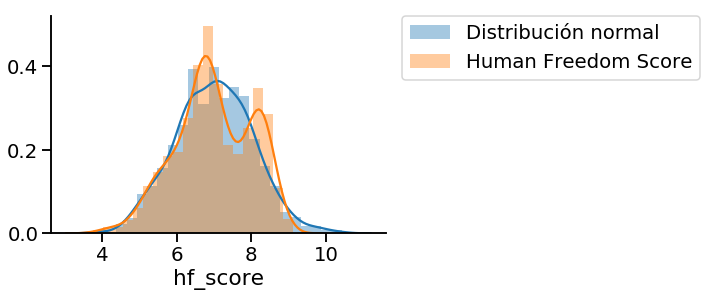

In [142]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(cdataset["hf_score"], label='Human Freedom Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

seaborn.despine()

In [135]:
import plotly.figure_factory as ff

fig = ff.create_distplot([sample,cdataset["hf_score"] ], ['Distribución normal','Human Freedom Score' ], bin_size=.1)
iplot(fig)

In [138]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(cdataset["hf_score"], percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(cdataset["hf_score"])), percs)

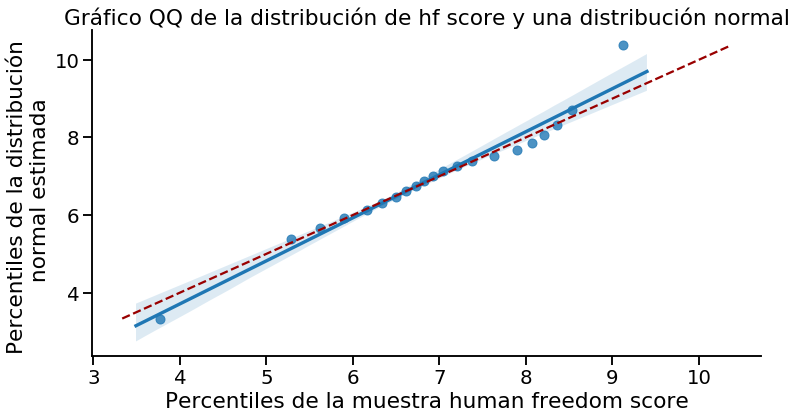

In [143]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra human freedom score')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf score y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color="#990000", ls="--")

seaborn.despine()

  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

Para empezar hf_score y ef_score, parecen tener cierta relación o al menos ir relativamente de la mano. Mientras que pf_identity no parece afectar las distribuciones de las otras variables. 
Si me parece adecuado porque entre otras cosas pf_identify es variable relacionado más a variables categoricas asi que describen la muestra pero no la defnine. 

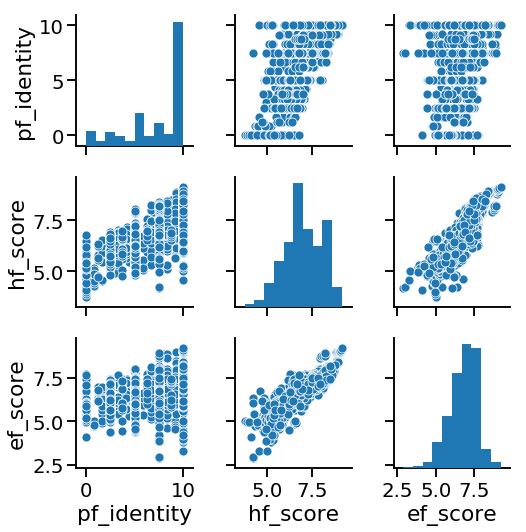

In [122]:
seaborn.pairplot(cdataset[["pf_identity", "hf_score", "ef_score"]])
#cdataset[["pf_identity", "hf_score", "ef_score"]].scatter_matrix()